In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Importing the data set

In [2]:
#Loading the data set
df=pd.read_csv("german_credit_data.csv")

The given data set contains 1000 features and  9 different columns
Columns and their data types are
-Age (numeric)

-Sex (text: male, female)

-Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)

-Housing (text: own, rent, or free)

-Saving accounts (text - little, moderate, quite rich, rich)

-Checking account (numeric, in DM - Deutsch Mark)

-Duration(numeric, in month)

-Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)

For more details about the dataset, please follow the link: https://www.kaggle.com/uciml/german-credit

In [3]:
# Renaming the columns accordingly
df.rename(columns={'Saving accounts': 'Saving_accounts', 'Checking account': 'Checking_account','Credit amount':'Credit_amount'}, inplace=True)

In [4]:
#Checking the head of the data set
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving_accounts,Checking_account,Credit_amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [5]:
#Descriptive Analysis
df.describe()

,Unnamed: 0,Age,Job,Credit_amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


In [6]:
# More information on the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving_accounts   817 non-null    object
 6   Checking_account  606 non-null    object
 7   Credit_amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


In [7]:
# Different values for Job in the dataset
df['Job'].unique()

array([2, 1, 3, 0], dtype=int64)

In [8]:
#Droping one of the feature from the dataset
df.drop(["Unnamed: 0"],inplace=True,axis=1)

### Data Visualization

<AxesSubplot:xlabel='Sex', ylabel='count'>

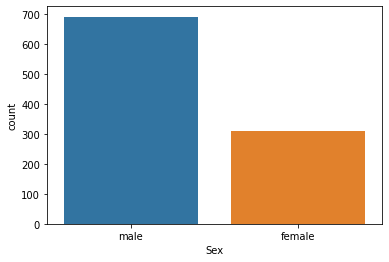

In [9]:
#Visualization of total number of males and females in the given data set with seaborn library
sns.countplot(df.Sex)

<AxesSubplot:xlabel='Age', ylabel='Density'>

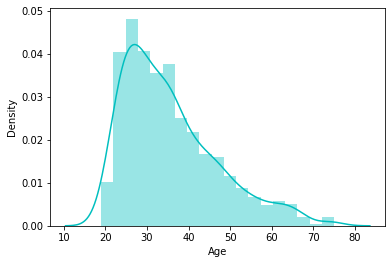

In [10]:
#Density plot for the ages
sns.distplot(df.Age,color='c')

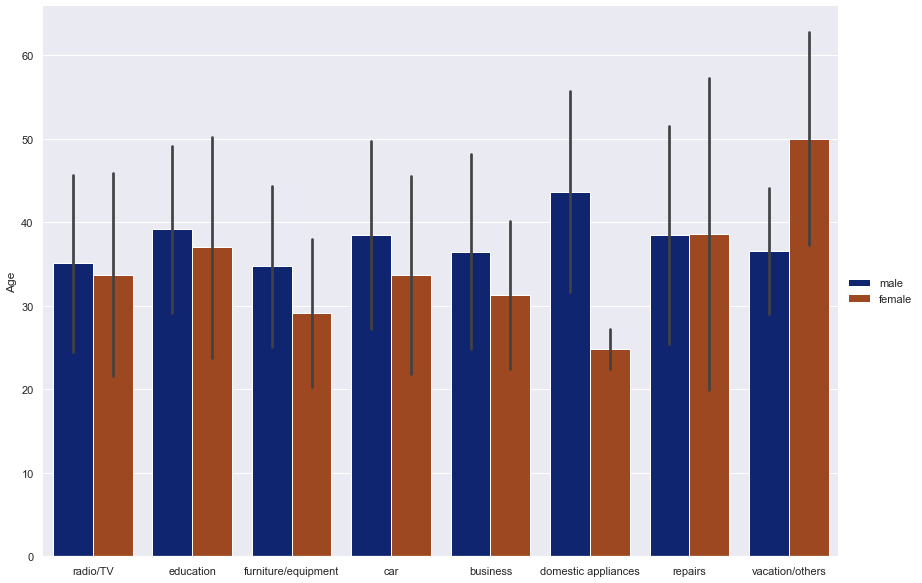

In [11]:
#Analysing the  respective ages of the number of females and males opting for their specific purpose 
sns.set(rc={'figure.figsize':(20,8.27)})
g = sns.catplot(data=df, kind="bar",x="Purpose", y="Age", hue="Sex",ci="sd", palette="dark", height=8.27, aspect=11.7/8.27)
g.despine(left=True)
g.set_axis_labels("", "Age")
g.legend.set_title("")

Text(0.5, 1.0, 'Credit amount vs Age of a person')

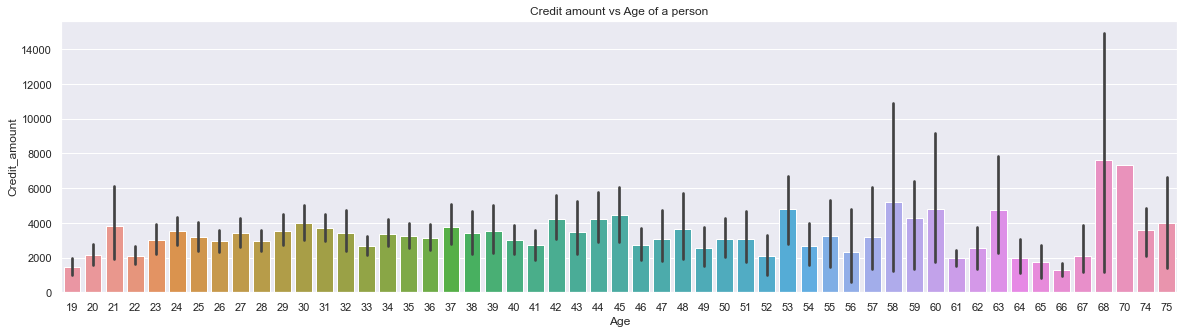

In [12]:
#Credit_amount vs Age
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(x=df.Age,y=df.Credit_amount,data=df)
ax.set_title("Credit amount vs Age of a person")

Text(0.5, 1.0, 'Duration vs Age of a person')

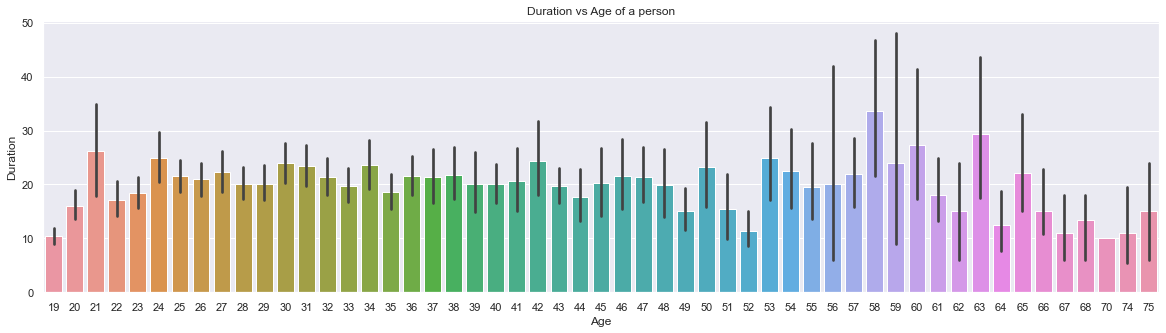

In [13]:
#Plot of Duration vs Age of a person
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(x=df.Age,y=df.Duration,
                
                data=df)
ax.set_title("Duration vs Age of a person")

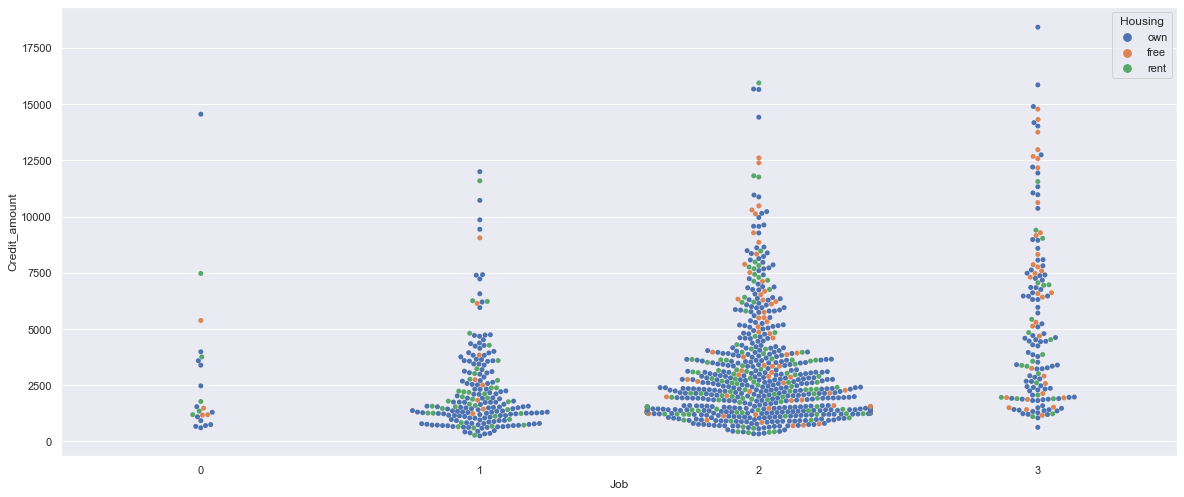

In [14]:
#Credit amount vs Job with a swarm plot
ax = sns.swarmplot(x="Job", y="Credit_amount", hue='Housing',
                 data=df)

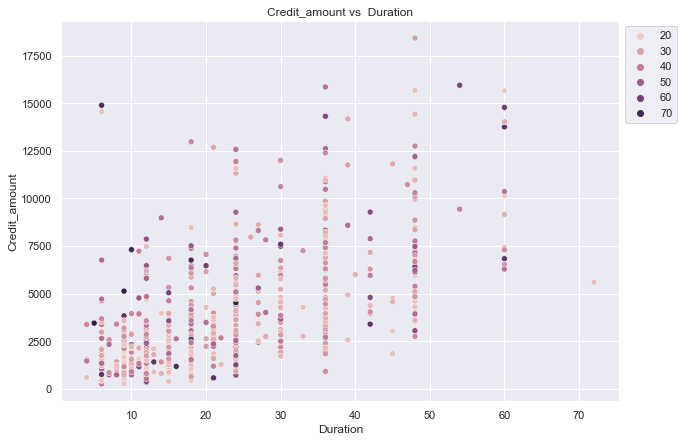

In [15]:
#Credit_amount vs (Duration,Age)
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(y="Credit_amount", x="Duration", hue="Age",
                data=df, ax=ax, sizes=(50, 300))
ax.set_title("Credit_amount vs  Duration")
ax.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

<AxesSubplot:xlabel='Saving_accounts', ylabel='Credit_amount'>

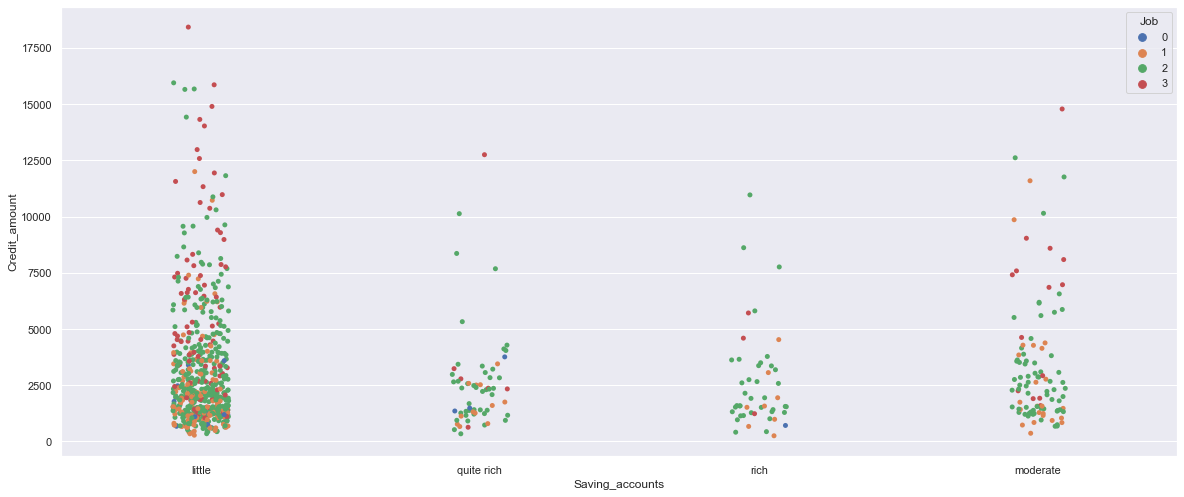

In [16]:
#Credit amount vs (Job and savings_account)
sns.stripplot(data=df, x="Saving_accounts", y="Credit_amount", hue="Job")

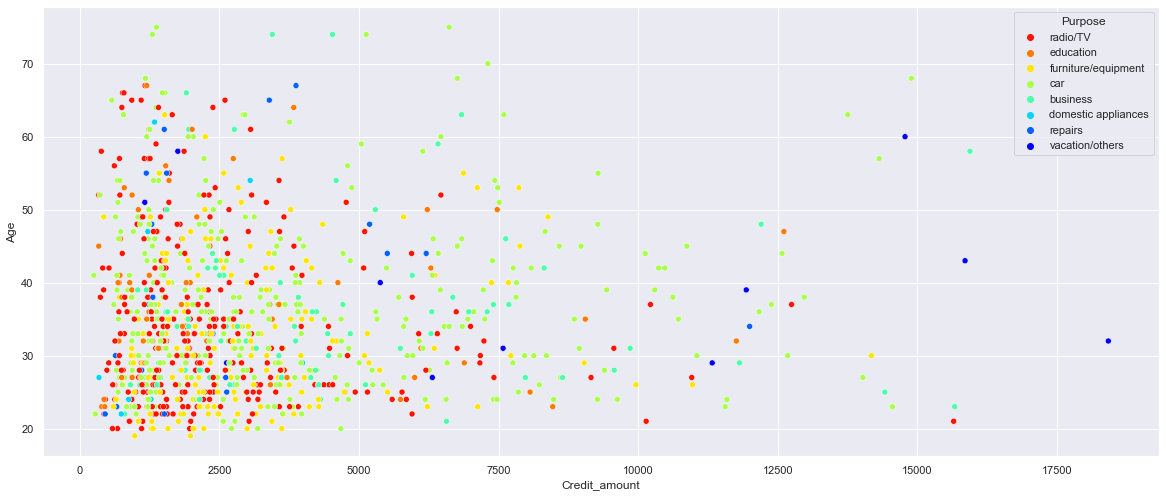

In [17]:
#Age vs (Credit_amount,Purpose)
ax = sns.scatterplot(x="Credit_amount", y="Age", hue='Purpose', data=df,palette="jet_r")

Text(0.5, 1.0, 'Credit_amount vs  Savings_accounts')

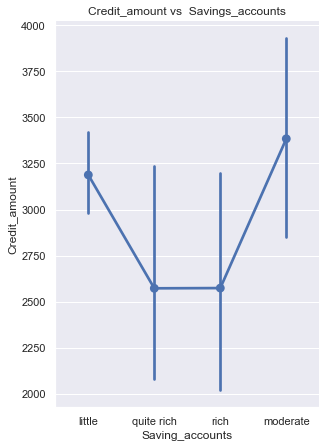

In [18]:
ax=sns.catplot(x="Saving_accounts", y="Credit_amount" ,height=6, aspect=.75,
                kind="point", data=df)
plt.title("Credit_amount vs  Savings_accounts")

Text(0.5, 1.0, 'Credit_amount vs  Checking_accounts')

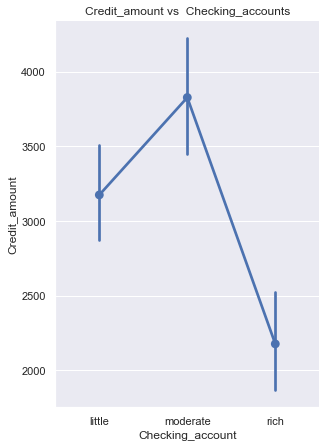

In [19]:
ax=sns.catplot(x="Checking_account", y="Credit_amount" ,height=6, aspect=.75,kind="point", data=df)
plt.title("Credit_amount vs  Checking_accounts")

<AxesSubplot:>

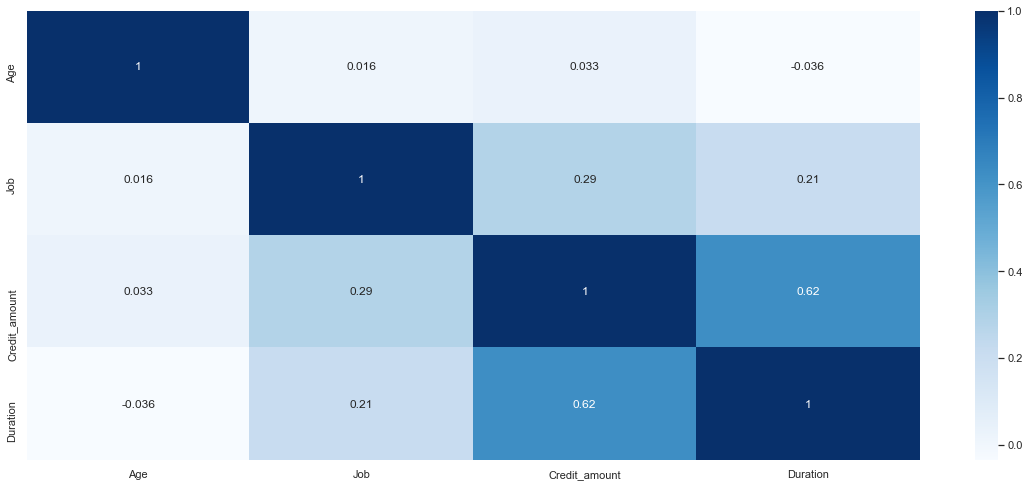

In [20]:
#Correlation map
sns.heatmap(df.corr(), annot=True, cmap='Blues')

In [21]:
#Check the null values 
df.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving_accounts     183
Checking_account    394
Credit_amount         0
Duration              0
Purpose               0
dtype: int64

In [22]:
#Separate the lists of numerical and categorical type
numerical = ['Credit_amount','Age','Duration']
categorical = ['Sex','Job','Housing','Saving_accounts','Checking_account','Purpose']

In [23]:
# Replace the null values with mode
for cat in categorical:
    df[cat] = df[cat].fillna(df[cat].mode().values[0])

In [24]:
#Creating a new data frame which includes selected features to form a cluster
df_cluster = pd.DataFrame()
df_cluster['Credit_amount'] = df['Credit_amount']
df_cluster['Age'] = df['Age']
df_cluster['Duration'] = df['Duration']
df_cluster['Job'] = df['Job']

In [25]:
#First five rows and their respective features in cluster dataset
df_cluster.head()

,Credit_amount,Age,Duration,Job
0,1169,67,6,2
1,5951,22,48,2
2,2096,49,12,1
3,7882,45,42,2
4,4870,53,24,2


In [26]:
#First five rows and their respective features in the complete dataset
df.head()

,Age,Sex,Job,Housing,Saving_accounts,Checking_account,Credit_amount,Duration,Purpose
0,67,male,2,own,little,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,little,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


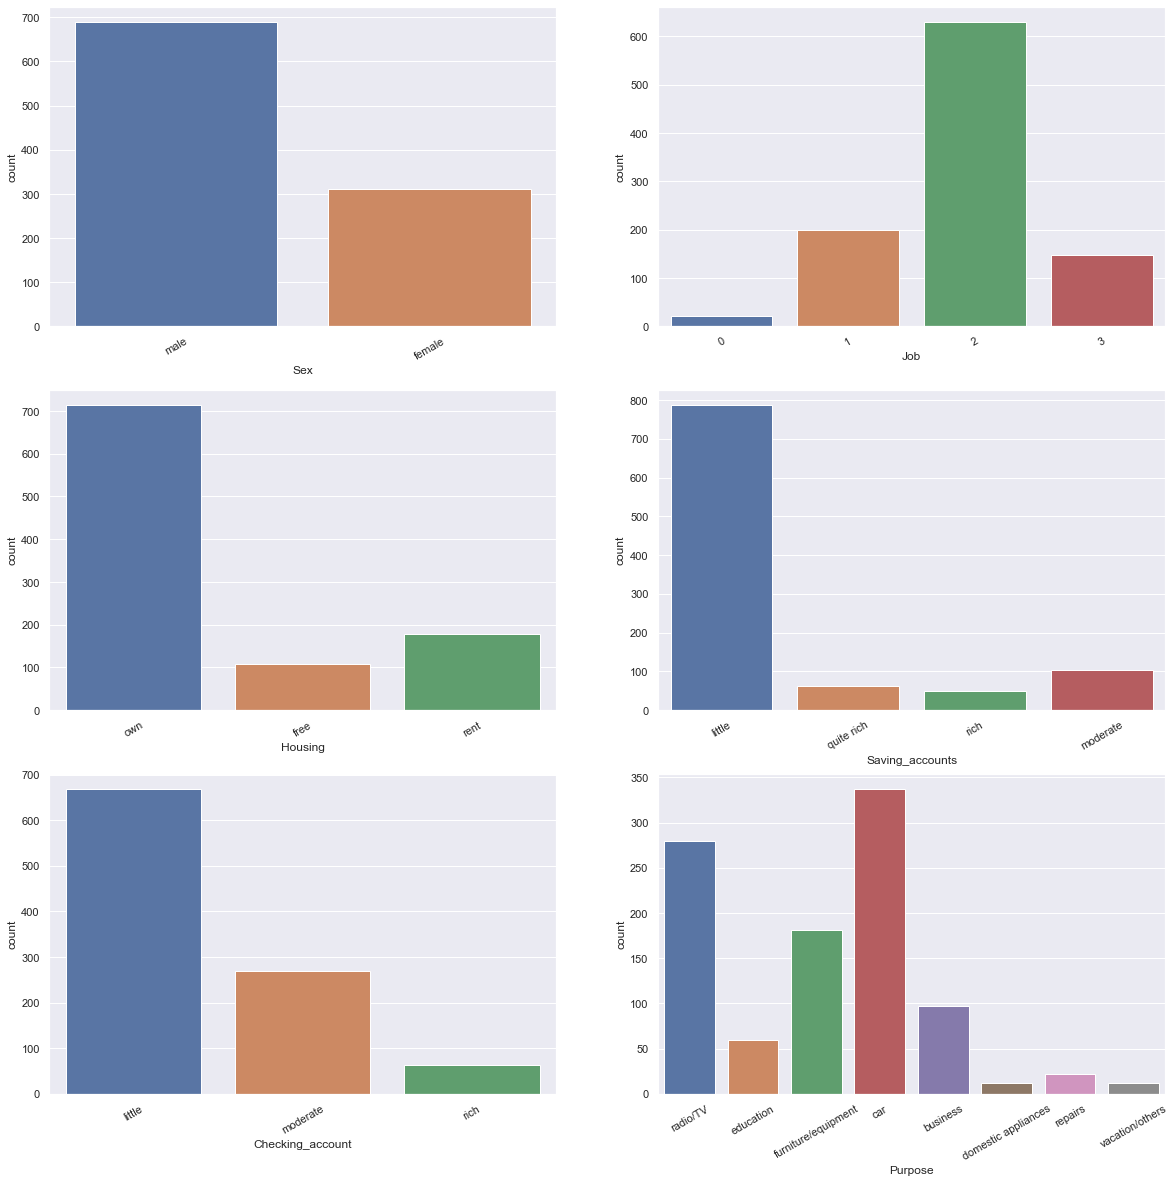

In [27]:
fig = plt.figure(figsize = (20,20))
axes = 320
for cat in categorical:
    axes += 1
    fig.add_subplot(axes)
    sns.countplot(data = df, x = df[cat])
    plt.xticks(rotation=30)
plt.show()

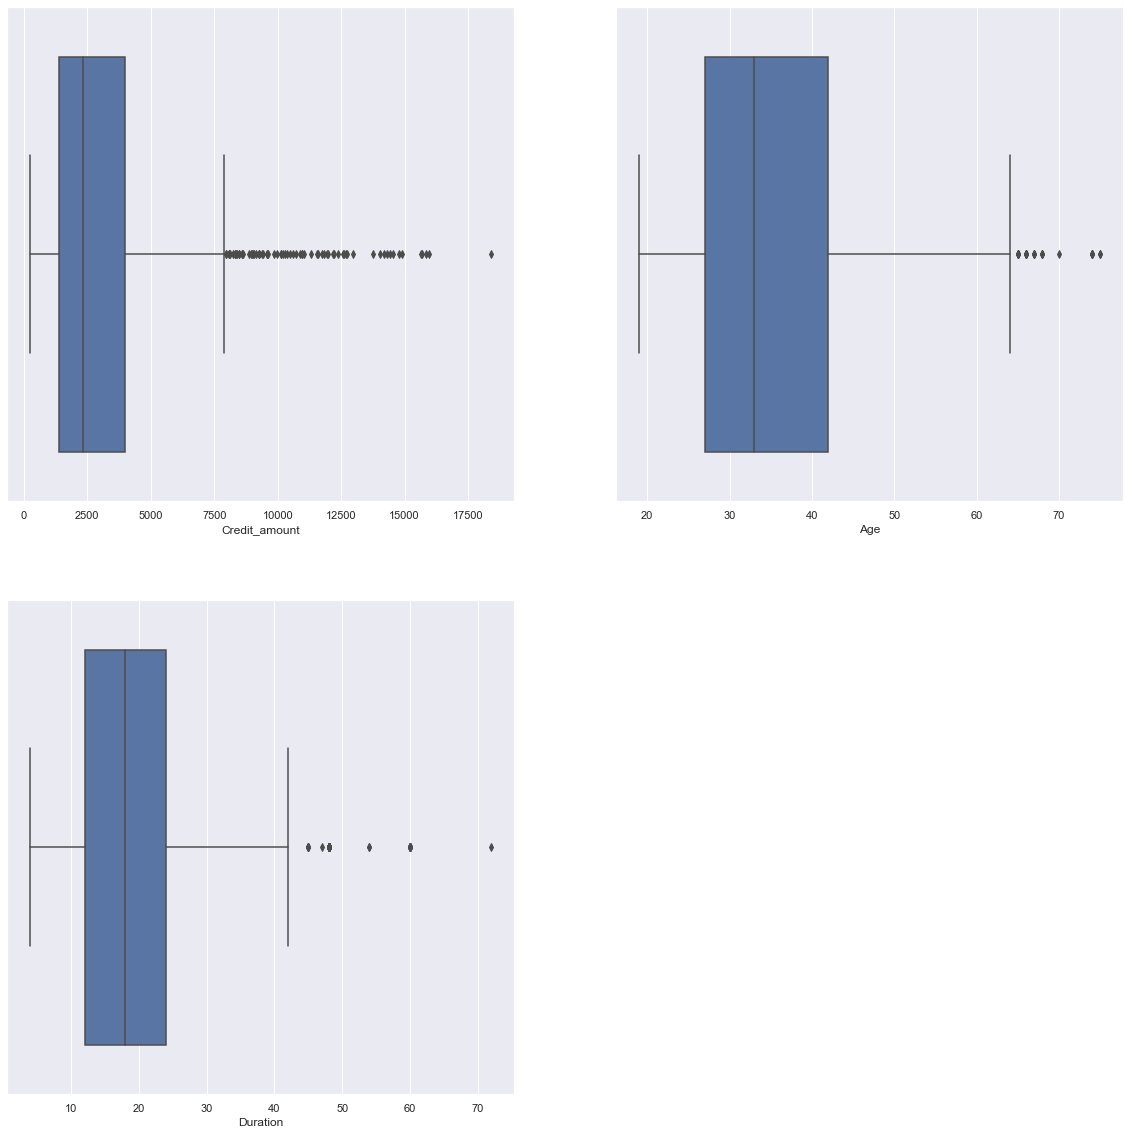

In [28]:
fig = plt.figure(figsize = (20,20))
axes = 220
for num in numerical:
    axes += 1
    fig.add_subplot(axes)
    sns.boxplot(data = df, x = num)
plt.show()

<AxesSubplot:xlabel='Job', ylabel='Density'>

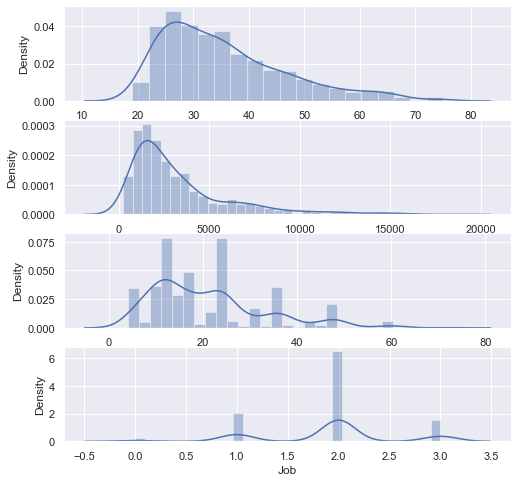

In [29]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(8,8))
sns.distplot(df["Age"], ax=ax1)
sns.distplot(df["Credit_amount"], ax=ax2)
sns.distplot(df["Duration"], ax=ax3)
sns.distplot(df["Job"], ax=ax4)

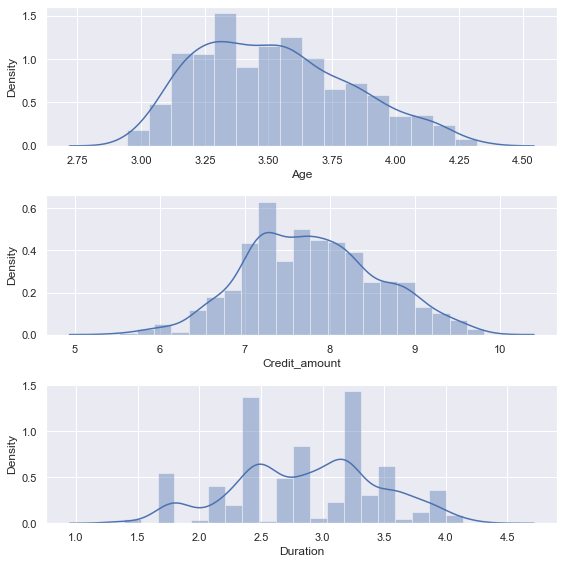

In [30]:
df_cluster_log = np.log(df_cluster[['Age', 'Credit_amount','Duration']])

fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8,8))
sns.distplot(df_cluster_log["Age"], ax=ax1)
sns.distplot(df_cluster_log["Credit_amount"], ax=ax2)
sns.distplot(df_cluster_log["Duration"], ax=ax3)
plt.tight_layout()

In [31]:
df_cluster_log.head()

,Age,Credit_amount,Duration
0,4.204693,7.063904,1.791759
1,3.091042,8.691315,3.871201
2,3.891820,7.647786,2.484907
3,3.806662,8.972337,3.737670
4,3.970292,8.490849,3.178054


In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(df_cluster_log)

### As the given data, doesn't contain the targets, segmentation has to done.Clustering is one such method,which forms different groups.

Different clustering algorithms that are taken into consideration are

1.K-means Clustering

2.Agglomerative Clustering

3.Density Based Spatial Clustering of Application with Noise (DBSCAN)

## 1.K-means Clustering:
This is one of the simplest and widely used algorithm.At the start,the desired number of cluster centers are intialized.The data points that are close to the cluster centers are assigned to their respective centers.The total iterations are continued until the the cluster centers attains a static position.In this case 'Elbow Method' is used to define the number of cluster centers to be employed.

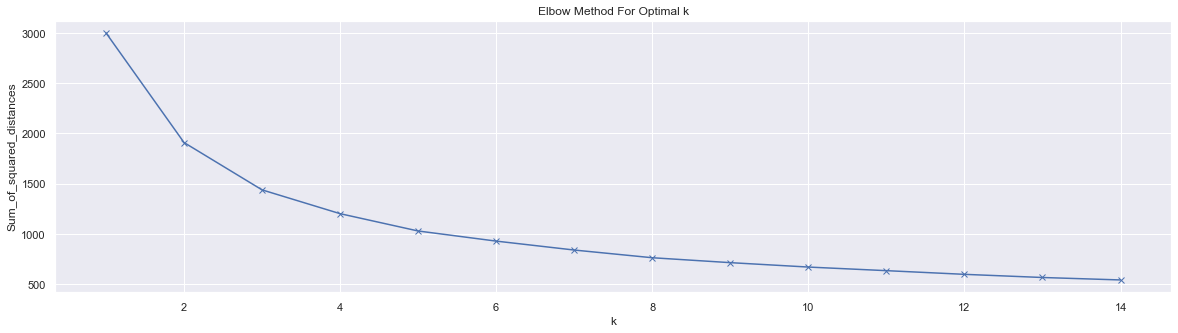

In [34]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(cluster_scaled)
    Sum_of_squared_distances.append(km.inertia_)
plt.figure(figsize=(20,5))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

K-Means


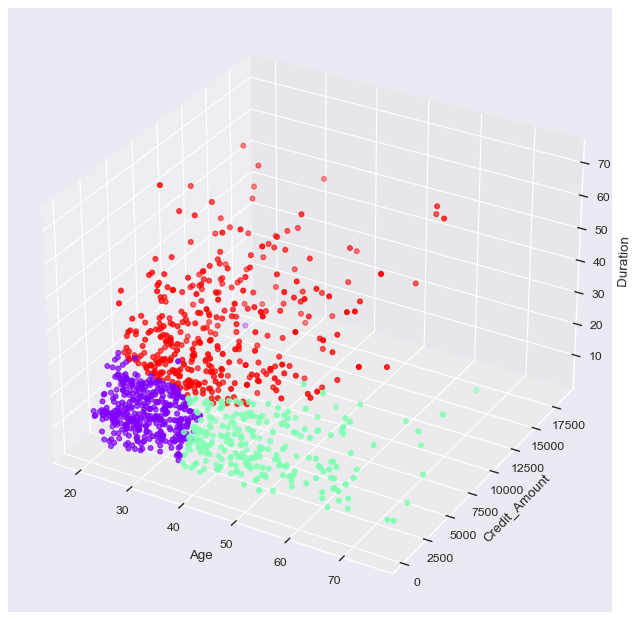

In [35]:
from mpl_toolkits.mplot3d import Axes3D

model = KMeans(n_clusters=3)
model.fit(cluster_scaled)
kmeans_labels = model.labels_

fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(df_cluster['Age'],df_cluster['Credit_amount'],df_cluster['Duration'],c=kmeans_labels, cmap='rainbow')

xLabel = ax.set_xlabel('Age', linespacing=3.2)
yLabel = ax.set_ylabel('Credit_Amount', linespacing=3.1)
zLabel = ax.set_zlabel('Duration', linespacing=3.4)
print("K-Means")

In [36]:
df_clustered_kmeans = df_cluster.assign(Cluster=kmeans_labels)
grouped_kmeans = df_clustered_kmeans.groupby(['Cluster']).mean().round(1)
grouped_kmeans

,Credit_amount,Age,Duration,Job
Cluster,,,,
0,1732.2,27.8,14.2,1.8
1,1979.7,48.7,13.9,1.7
2,5665.4,34.0,32.2,2.1


## 2.Agglomerative Clustering:

In Agglomerative clustering ,initially n different clusters are intialized with the available number of data points.As the iterations continue, the clusters, which are similar or close to each other form into another large cluster.The iterations are continued until,a final or one single cluster is obtained.This approach is also called dendogram.

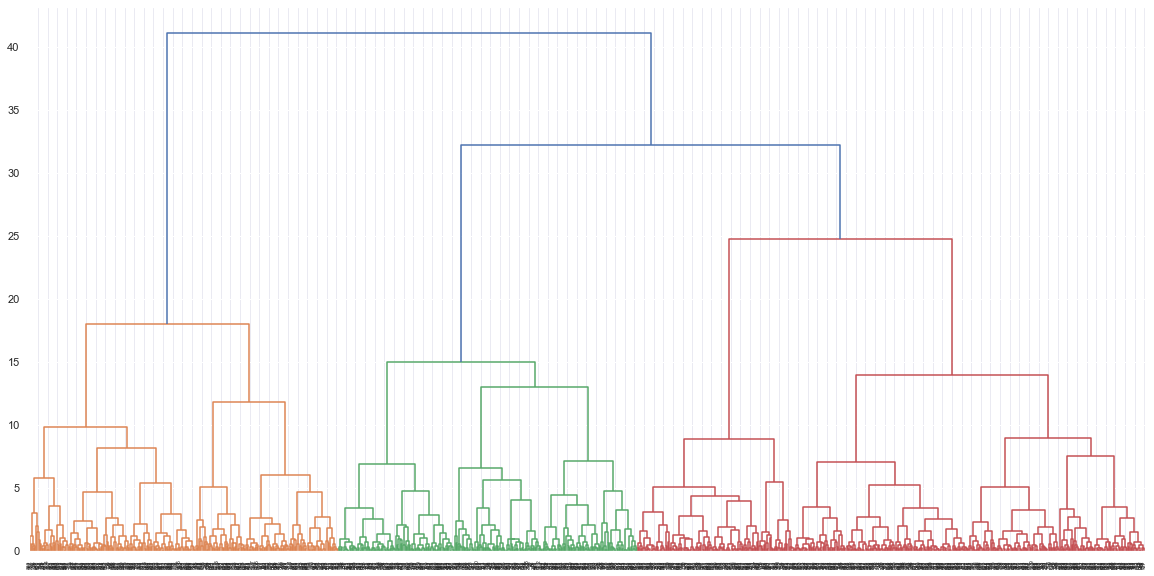

In [37]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(20,10))
dendrogram = sch.dendrogram(sch.linkage(cluster_scaled, method='ward'))

Hierarchical Agglomerative Clustering


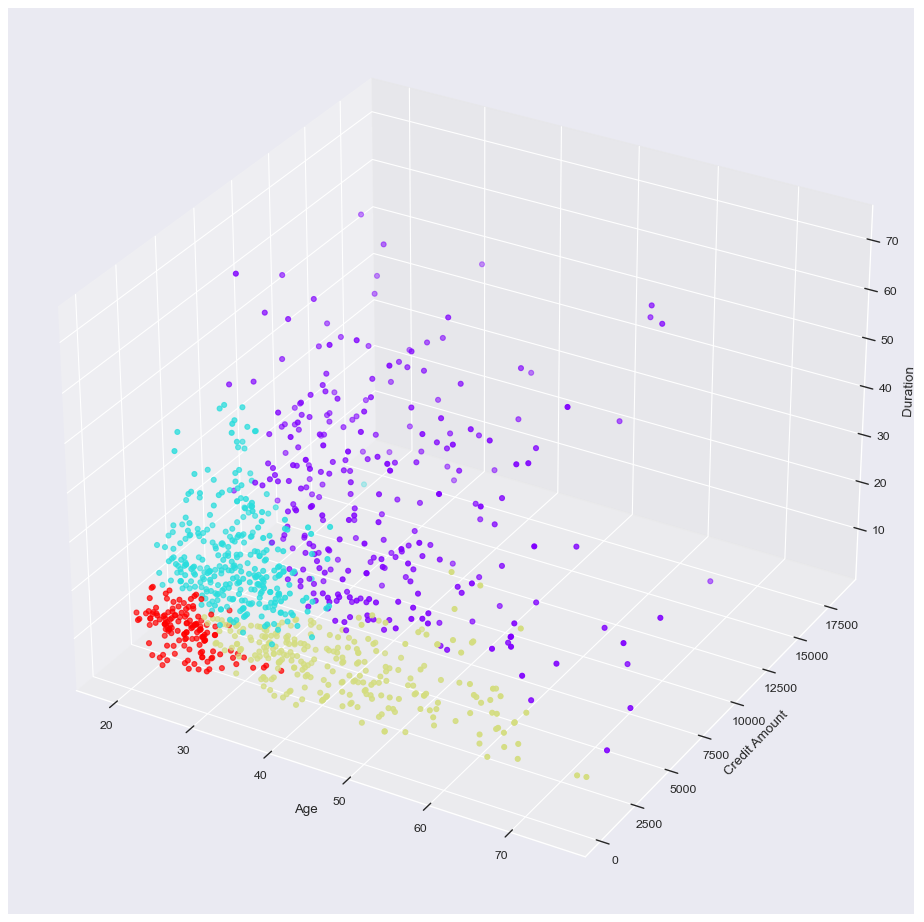

In [38]:
print("Hierarchical Agglomerative Clustering")
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=4)
model.fit(cluster_scaled)
hac_labels = model.labels_

fig = plt.figure(num=None, figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(df_cluster['Age'],df_cluster['Credit_amount'],df_cluster['Duration'],c=hac_labels, cmap='rainbow')

xLabel = ax.set_xlabel('Age', linespacing=3.2)
yLabel = ax.set_ylabel('Credit Amount', linespacing=3.1)
zLabel = ax.set_zlabel('Duration', linespacing=3.4)

In [39]:
df_clustered_hac = df_cluster.assign(Cluster=hac_labels)
grouped_hac = df_clustered_hac.groupby(['Cluster']).mean().round(1)
grouped_hac

,Credit_amount,Age,Duration,Job
Cluster,,,,
0,6477.0,40.4,32.0,2.2
1,2748.0,28.8,23.6,1.9
2,1644.1,44.0,11.7,1.7
3,1231.5,25.1,10.6,1.7


## 3.Density Based Spatial Clustering of Application with Noise (DBSCAN)

This type of clustering mainly involves two types of parameters.The first one is Epsilon (Ɛ),a radius parameter..The second hyperparameter is minimum number of points.DBSCAN reqires no specific number of clusters to be defined at the start.

DBSCAN


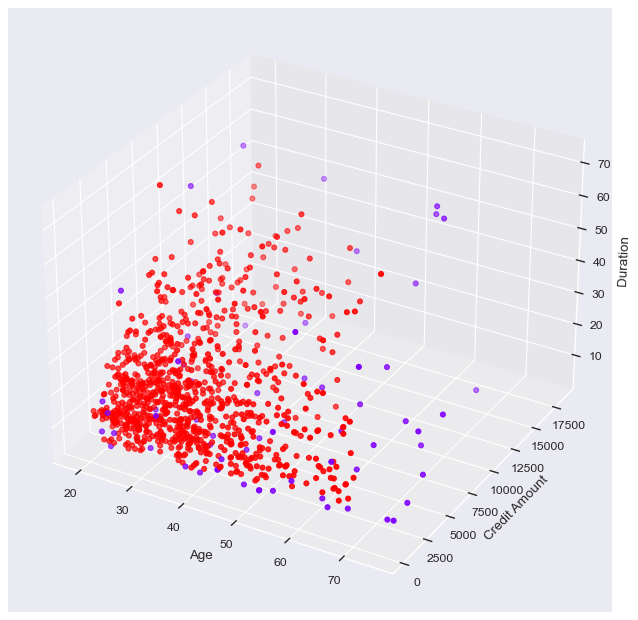

In [40]:
from sklearn.cluster import DBSCAN

model = DBSCAN()
model.fit(cluster_scaled)
dbs_labels = model.labels_

fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(df_cluster['Age'],df_cluster['Credit_amount'],df_cluster['Duration'],c=dbs_labels, cmap='rainbow')

xLabel = ax.set_xlabel('Age', linespacing=3.2)
yLabel = ax.set_ylabel('Credit Amount', linespacing=3.1)
zLabel = ax.set_zlabel('Duration', linespacing=3.4)
print("DBSCAN")

### After comparing different clustering algorithms and their respective results, K-means algorithm has been considered the best algorithm for this task

In [41]:
#Different clusters obtained in K-Means Clustering
grouped_kmeans

,Credit_amount,Age,Duration,Job
Cluster,,,,
0,1732.2,27.8,14.2,1.8
1,1979.7,48.7,13.9,1.7
2,5665.4,34.0,32.2,2.1


###### Therore,the given banks clients data has been divided into clusters(0,1,2) using K-means clustering algorithm.

In [42]:
df_clustered = df.assign(Cluster=kmeans_labels)

In [43]:
df_clustered.head()

,Age,Sex,Job,Housing,Saving_accounts,Checking_account,Credit_amount,Duration,Purpose,Cluster
0,67,male,2,own,little,little,1169,6,radio/TV,1
1,22,female,2,own,little,moderate,5951,48,radio/TV,2
2,49,male,1,own,little,little,2096,12,education,1
3,45,male,2,free,little,little,7882,42,furniture/equipment,2
4,53,male,2,free,little,little,4870,24,car,2


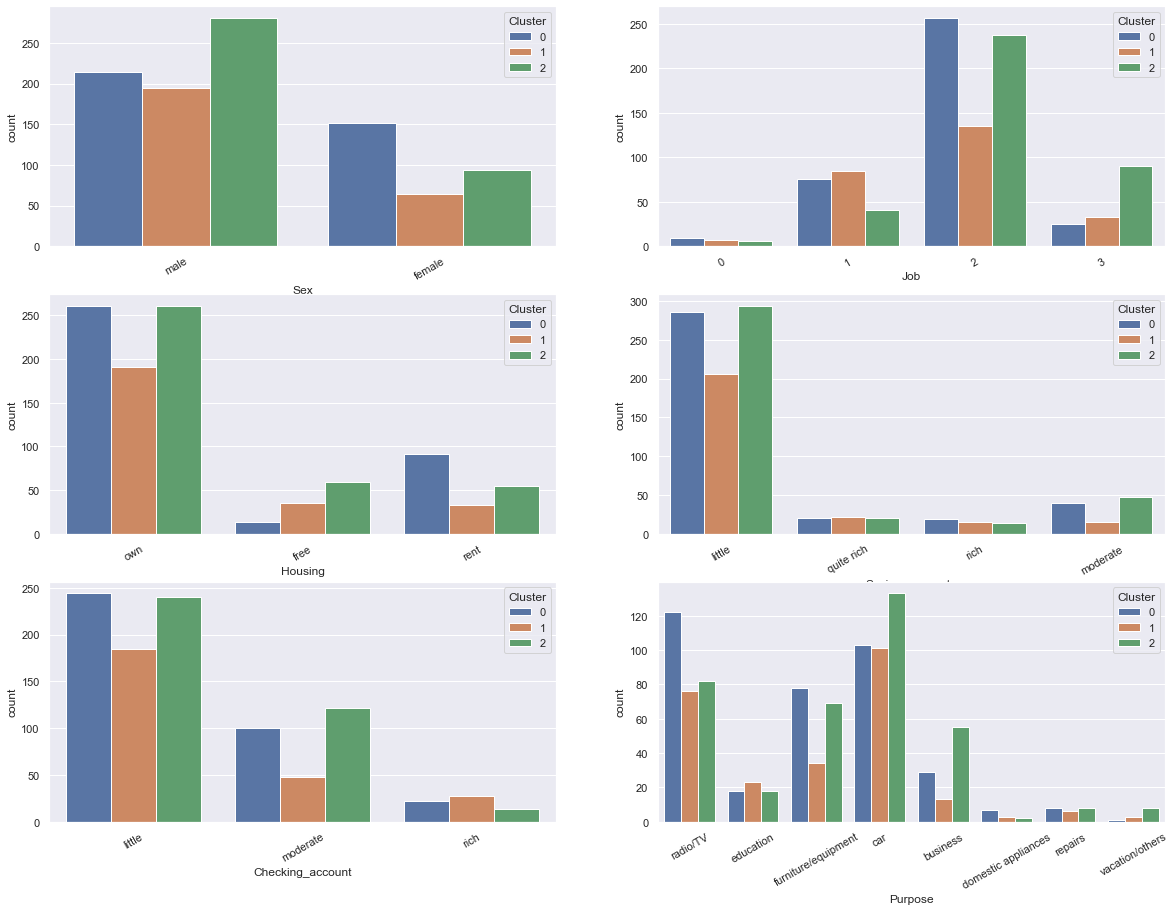

In [44]:
# Count plot for different features in the data set
fig = plt.figure(figsize = (20,15))
axes = 320
for cat in categorical:
    axes += 1
    fig.add_subplot(axes)
    sns.countplot(data = df_clustered, hue=df_clustered['Cluster'], x = cat)
    plt.xticks(rotation=30)
plt.show()

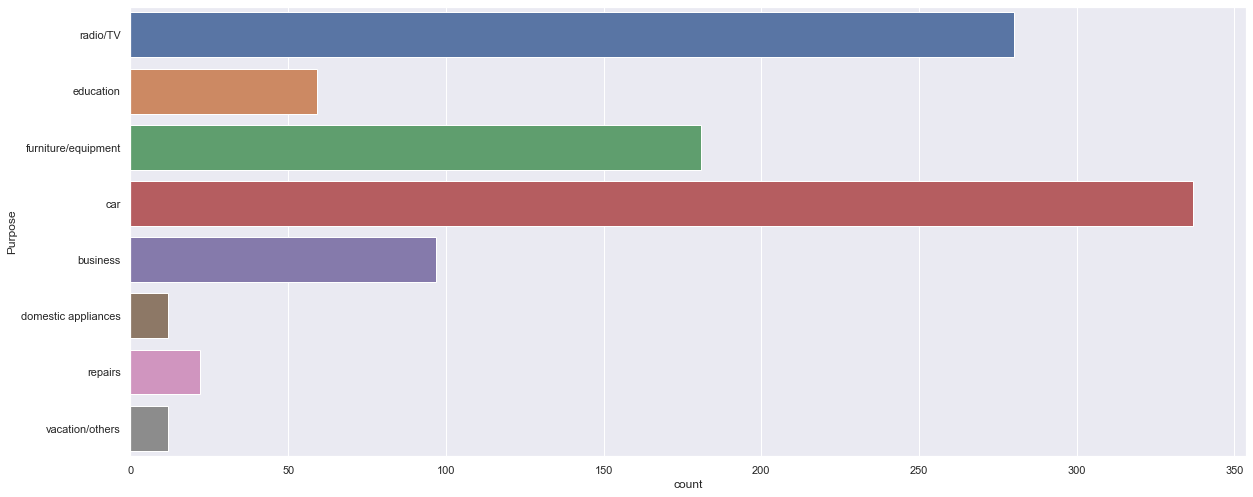

In [45]:
sns.countplot(y ='Purpose', data = df_clustered)
plt.show()

### Interpretation

For each cluster(0,1,2),

--The number of males are greater than the number of females.

--Job '2' has the highest count among other jobs types.

--The housing type of 'own' has the highest count among other housing types.

--Savings account type of "little" has the highest count amoung other types.Same applies for checking_account.



--Most of the people in all three clusters, opted for the purpose of Car,radio,TV,furniture,business.


## References:

1.https://www.analytixlabs.co.in/blog/types-of-clustering-algorithms/